In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

### using the load_iris dataset for the bagging example here 

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data)

In [5]:
df.columns = iris.feature_names
df['target'] = iris.target

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


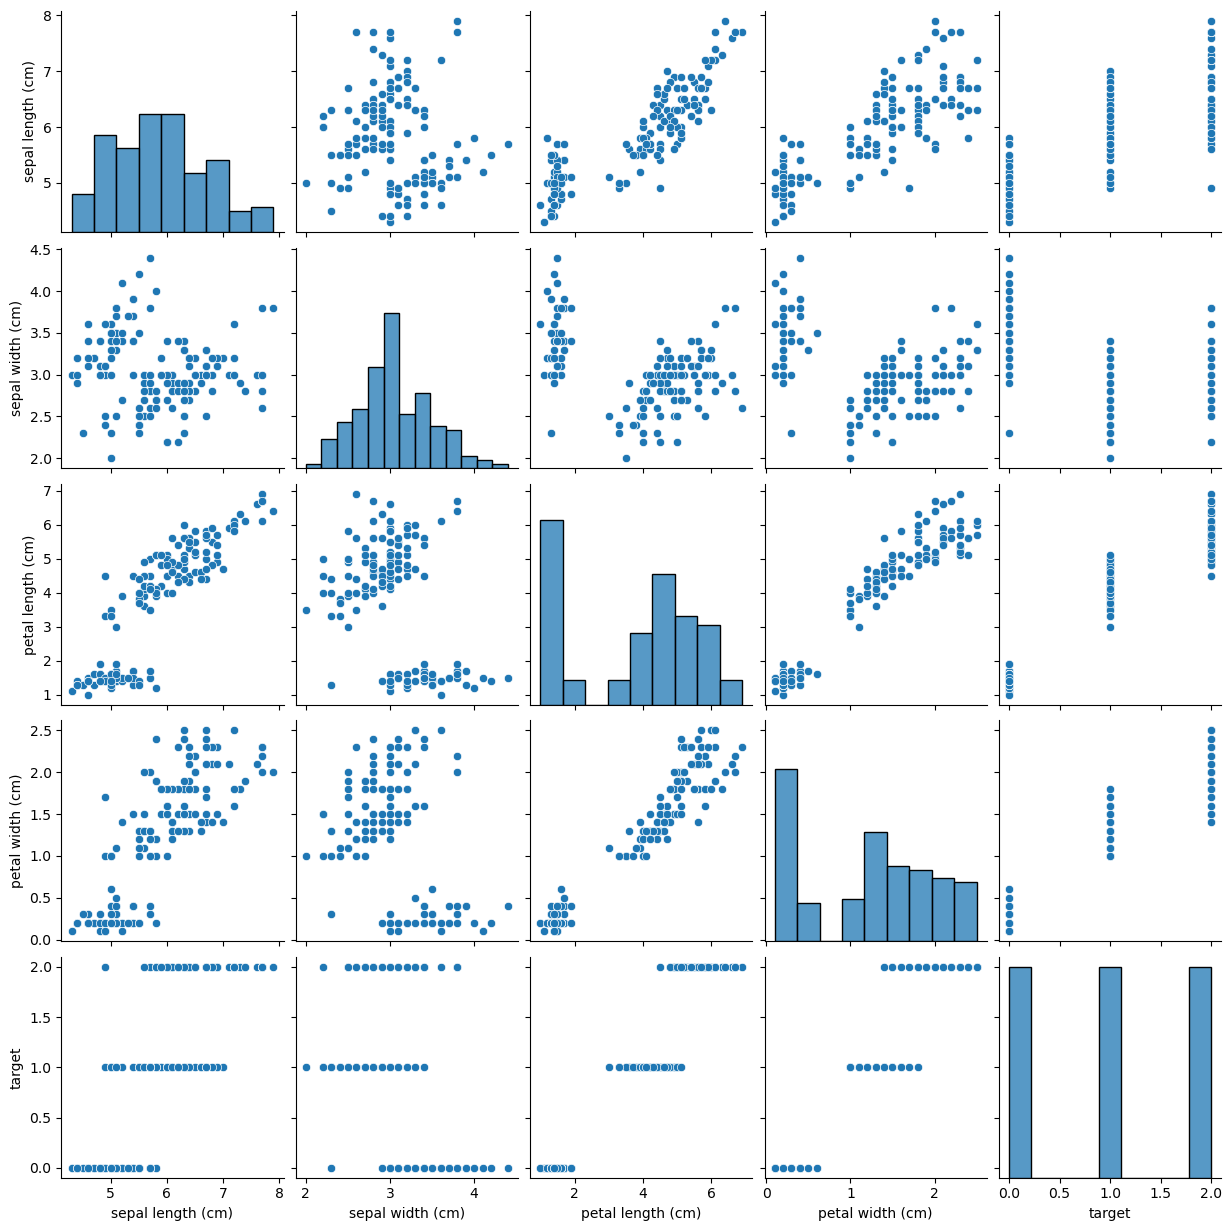

In [16]:
sns.pairplot(df)

### using only the sepal width and the petal length with no target = 0 so that the classification becomes difficult (refer to the pair plot above)

In [10]:
newdf = df[df['target']!=0][['sepal width (cm)','petal length (cm)','target']]

In [11]:
newdf

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


### graphical representation of the classification problem here

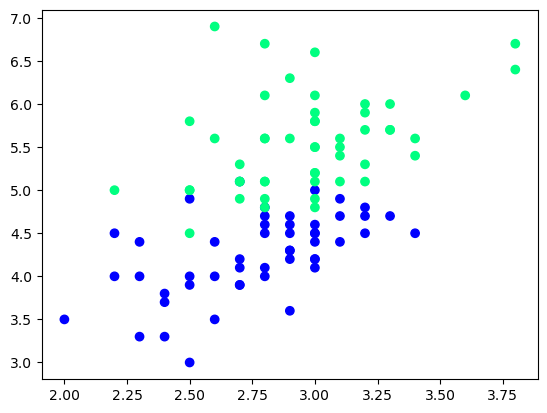

In [15]:
plt.scatter(newdf['sepal width (cm)'], newdf['petal length (cm)'], c=newdf['target'], cmap='winter')

In [18]:
newdf.shape

(100, 3)

In [37]:
df_train = newdf.iloc[:60,:].sample(10)
df_val = newdf.iloc[60:80,:].sample(5)
df_test = newdf.iloc[80:,:].sample(5)

In [38]:
df_train

,sepal width (cm),petal length (cm),target
92,2.6,4.0,1
94,2.7,4.2,1
66,3.0,4.5,1
83,2.7,5.1,1
86,3.1,4.7,1
85,3.4,4.5,1
89,2.5,4.0,1
104,3.0,5.8,2
56,3.3,4.7,1
102,3.0,5.9,2


In [39]:
df_val

,sepal width (cm),petal length (cm),target
127,3.0,4.9,2
119,2.2,5.0,2
115,3.2,5.3,2
121,2.8,4.9,2
129,3.0,5.8,2


In [40]:
df_test

,sepal width (cm),petal length (cm),target
134,2.6,5.6,2
146,2.5,5.0,2
138,3.0,4.8,2
131,3.8,6.4,2
143,3.2,5.9,2


In [41]:
dt1 = DecisionTreeClassifier(max_depth=None)
dt2 = DecisionTreeClassifier(max_depth=None)
dt3 = DecisionTreeClassifier(max_depth=None)

In [42]:
def evaluate(clf,x_train,y_train):
    clf.fit(x_train,y_train)
    plot_tree(clf)
    y_pred = clf.predict(x_test)
    print(f"accuracy is {accuracy_score(y_pred,y_test)}")
    

In [68]:
x_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

### data for classifier 1

In [69]:
df_bag = df_train.sample(8,replace=True)
x_train = df_bag.iloc[:,0:2]
y_train = df_bag.iloc[:,-1]

In [70]:
x_train

,sepal width (cm),petal length (cm)
92,2.6,4.0
56,3.3,4.7
94,2.7,4.2
85,3.4,4.5
66,3.0,4.5
102,3.0,5.9
83,2.7,5.1
104,3.0,5.8


In [71]:
y_train

92     1
56     1
94     1
85     1
66     1
102    2
83     1
104    2
Name: target, dtype: int64

accuracy is 0.2


/home/user550/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


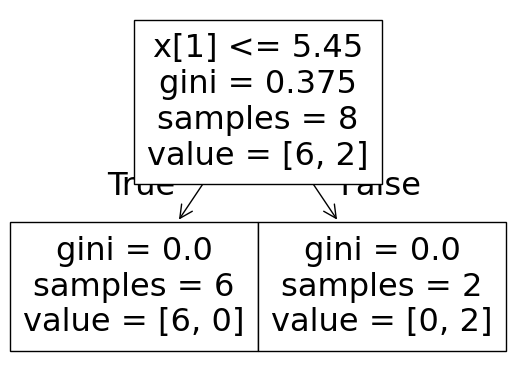

In [72]:
evaluate(dt1,x_train,y_train)

### data for classifier 2

In [73]:
df_bag2 = df_train.sample(8,replace=True)
x_train = df_bag2.iloc[:,0:2]
y_train = df_bag2.iloc[:,-1]

In [74]:
x_train

,sepal width (cm),petal length (cm)
86,3.1,4.7
85,3.4,4.5
86,3.1,4.7
56,3.3,4.7
66,3.0,4.5
104,3.0,5.8
102,3.0,5.9
66,3.0,4.5


In [75]:
y_train

86     1
85     1
86     1
56     1
66     1
104    2
102    2
66     1
Name: target, dtype: int64

accuracy is 0.4


/home/user550/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


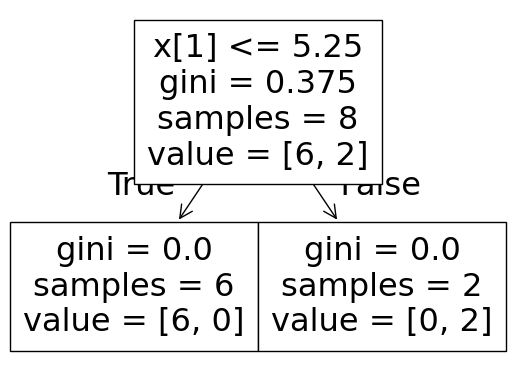

In [76]:
evaluate(dt2,x_train,y_train)

### data for classifier 3

In [77]:
df_bag3 = df_train.sample(8,replace=True)
x_train = df_bag3.iloc[:,0:2]
y_train = df_bag3.iloc[:,-1]

In [78]:
x_train

,sepal width (cm),petal length (cm)
85,3.4,4.5
92,2.6,4.0
83,2.7,5.1
92,2.6,4.0
86,3.1,4.7
102,3.0,5.9
104,3.0,5.8
104,3.0,5.8


In [79]:
y_train

85     1
92     1
83     1
92     1
86     1
102    2
104    2
104    2
Name: target, dtype: int64

accuracy is 0.2


/home/user550/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


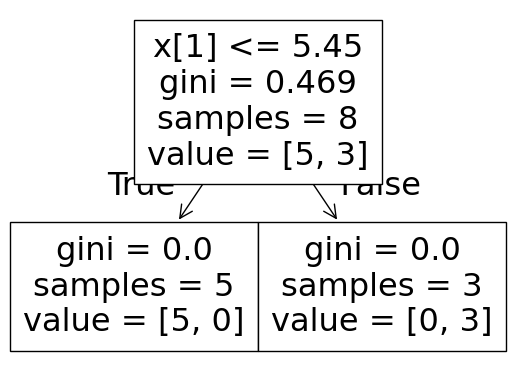

In [80]:
evaluate(dt3,x_train,y_train)

## prediction

In [82]:
df_test

,sepal width (cm),petal length (cm),target
134,2.6,5.6,2
146,2.5,5.0,2
138,3.0,4.8,2
131,3.8,6.4,2
143,3.2,5.9,2


In [83]:
print("Predictor 1",dt1.predict(np.array([2.6,5.6]).reshape(1,2)))
print("Predictor 2",dt2.predict(np.array([2.6,5.6]).reshape(1,2)))
print("Predictor 3",dt3.predict(np.array([2.6,5.6]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/home/user550/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/user550/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/user550/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# pasting

In [84]:
# Row sampling without replacement
df_train

,sepal width (cm),petal length (cm),target
92,2.6,4.0,1
94,2.7,4.2,1
66,3.0,4.5,1
83,2.7,5.1,1
86,3.1,4.7,1
85,3.4,4.5,1
89,2.5,4.0,1
104,3.0,5.8,2
56,3.3,4.7,1
102,3.0,5.9,2


In [85]:
df_train.sample(8)

,sepal width (cm),petal length (cm),target
89,2.5,4.0,1
102,3.0,5.9,2
86,3.1,4.7,1
83,2.7,5.1,1
66,3.0,4.5,1
104,3.0,5.8,2
92,2.6,4.0,1
94,2.7,4.2,1


# random subspaces

In [86]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [87]:
df.sample(2,replace=True,axis=1)

,petal length (cm),petal length (cm)
0,1.4,1.4
1,1.4,1.4
2,1.3,1.3
3,1.5,1.5
4,1.4,1.4
...,...,...
145,5.2,5.2
146,5.0,5.0
147,5.2,5.2
148,5.4,5.4


# random patches

In [88]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [89]:
df.sample(8,replace=True).sample(2,replace=True,axis=1)

,sepal width (cm),petal length (cm)
8,2.9,1.4
46,3.8,1.6
66,3.0,4.5
85,3.4,4.5
78,2.9,4.5
143,3.2,5.9
121,2.8,4.9
116,3.0,5.5
